# Dataset
[sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html)

### 学習データとテストデータの分割

In [1]:
import random
import numpy as np
from sklearn import datasets

random.seed(0)

iris = datasets.load_iris()

shuffle_idx = np.arange(len(iris.data))  # [0..150]データ数と同じサイズのインデックスのリスト
random.shuffle(shuffle_idx)  # 順序をランダムに入れ替え

# dataとtargetをshuffle_idxに従って並び替え
# dataとtargetは対応しているので同じ順序で並び替える (個別にシャッフルしない)
iris_data = iris.data[shuffle_idx]
iris_target = iris.target[shuffle_idx]

# 10%をテストデータに
test_num = int(len(iris_data) * 0.1)

iris_test_data = iris_data[:test_num]
iris_test_target = iris_target[:test_num]

iris_train_data = iris_data[test_num:]
iris_train_target = iris_target[test_num:]

print(f"iris: train({len(iris_train_data)}) test({len(iris_test_data)})")

# 上と同じようにdigitsも
digits = datasets.load_digits()

shuffle_idx = np.arange(len(digits.data))
random.shuffle(shuffle_idx)

digits_data = digits.data[shuffle_idx]
digits_target = digits.target[shuffle_idx]

test_num = int(len(digits_data) * 0.1)

digits_test_data = digits_data[:test_num]
digits_test_target = digits_target[:test_num]

digits_train_data = digits_data[test_num:]
digits_train_target = digits_target[test_num:]

print(f"digits: train({len(digits_train_data)}) test({len(digits_test_data)})")

iris: train(135) test(15)
digits: train(1618) test(179)


# kNN(k nearest neighbor, k最近傍法)
+ [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
+ [sklern.neighbors.KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

### アルゴリズム
+ データベース（学習データ）から似てる順(L2ノルム、内積など)にk個取り出す
+ k個のクラスで多数決をとる（同率1位の場合はリジェクトしたりランダムに選んだりする）

クラス分類する画像を1枚選ぶ


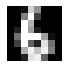

正解: 6

学習データの中から似てる順に5枚選ぶ(metric:L2)


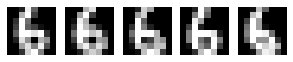

[6 6 6 6 6]
多数決
→5票で最大なので「6」と予測
→正解！

学習データの中から似てる順に5枚選ぶ(metric:dot)


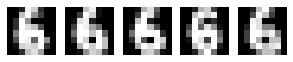

[6 6 6 6 6]
多数決
→5票で最大なので「6」と予測
→正解！



In [3]:
# 自前実装
import matplotlib.pyplot as plt
from collections import defaultdict

print(f"クラス分類する画像を1枚選ぶ")
test_ind = random.randrange(len(digits_test_data))
input_img = digits_test_data[test_ind]
gt_cls = digits_test_target[test_ind]
# 画像表示
plt.figure(figsize=(1,1))
plt.imshow(input_img.reshape(8,8), cmap="gray")
plt.axis('off')
plt.show()
# クラス表示
print(f"正解: {gt_cls}\n")

K=5
for metric in ["L2", "dot"]:
  print(f"学習データの中から似てる順に{K}枚選ぶ(metric:{metric})")
  if metric == "L2":
    distance = np.linalg.norm(digits_train_data - input_img, axis=1)  # 全学習データとのL2ノルム（低いほど似ている）
    top_k_ind = np.argsort(distance)[:K]  # argsort:昇順ソート結果をindexで返す :Kで最初のK個を選ぶ
  else:
    similarity = np.dot(digits_train_data, input_img)  # 全学習データとの内積（高いほど似ている）
    top_k_ind = np.argsort(similarity)[::-1][:K]  # argsort:昇順ソート結果をindexで返す :Kで最初のK個を選ぶ
  # 画像表示
  plt.figure(figsize=(K,1))
  for i, data in enumerate(digits_train_data[top_k_ind], 1):
    plt.subplot(1,K,i)
    plt.imshow(data.reshape(8, 8), cmap="gray")
    plt.axis('off')
  plt.show()
  # クラス表示
  print(digits_train_target[top_k_ind])

  print(f"多数決")
  vote = defaultdict(int)
  for cls in digits_train_target[top_k_ind]:
    vote[cls] += 1
  pred_cls, vote_num = max(vote.items(), key=lambda x: x[1])
  print(f"→{vote_num}票で最大なので「{pred_cls}」と予測")

  gt_cls = digits_test_target[test_ind]
  if pred_cls == gt_cls:
    print("→正解！\n")
  else:
    print("→不正解...\n")

In [4]:
# sklearnによる実装
#  内部で近傍探索の最適化などもやっている(KD-treeの構築など)
from sklearn.neighbors import KNeighborsClassifier

# train
model = KNeighborsClassifier(n_neighbors=3)  # k=3
model.fit(iris_train_data, iris_train_target)  # モデルの作成(デフォルトはL2ノルム)

# eval
pred = model.predict(iris_test_data)
print(f"prediction: {pred}")
print(f"ground truth: {iris_test_target}")
print(f"accuracy: {sum(pred==iris_test_target) / len(iris_test_target)}")

print()

# scoreを使えば評価まで一気に計算できる
print(model.score(iris_test_data, iris_test_target))

prediction: [0 1 1 2 1 0 1 2 1 0 0 2 0 2 0]
ground truth: [0 1 1 2 1 0 1 2 2 0 0 2 0 2 0]
accuracy: 0.9333333333333333

0.9333333333333333


In [5]:
# kの違いによる精度の変化
print("iris")
for k in range(1,10):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(iris_train_data, iris_train_target)
  print(f"k={k}\t{model.score(iris_test_data, iris_test_target):.2f}")

print()

print("digits")
for k in range(1,30):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(digits_train_data, digits_train_target)
  print(f"k={k}\t{model.score(digits_test_data, digits_test_target):.2f}")

iris
k=1	0.93
k=2	0.93
k=3	0.93
k=4	0.93
k=5	1.00
k=6	1.00
k=7	1.00
k=8	1.00
k=9	1.00

digits
k=1	0.99
k=2	0.99
k=3	0.99
k=4	0.99
k=5	0.99
k=6	0.99
k=7	0.99
k=8	0.99
k=9	0.99
k=10	0.99
k=11	0.99
k=12	0.99
k=13	0.98
k=14	0.99
k=15	0.98
k=16	0.99
k=17	0.99
k=18	0.99
k=19	0.99
k=20	0.99
k=21	0.98
k=22	0.98
k=23	0.98
k=24	0.98
k=25	0.98
k=26	0.98
k=27	0.98
k=28	0.98
k=29	0.97


+ メリット
  + 発想がシンプルでわかりやすい
  + ハイパパラメータ(自分で手動で決める値)がkのみ
  + 学習するパラメータはない
+ デメリット
  + 次元が大きすぎるとうまくいかない
  + データ数が多くなると近傍探索をがんばらないといけない